<h1 style='text-align:center;'>NETFLIX DATA VISUALISATION</h1>

<h4 style='text-align:center;'>Project Overview: This project explores Netflix data to identify trends, analyze ratings, and provide insights into viewer preferences.</h4>

<center>
    <img src="https://static.vecteezy.com/system/resources/previews/042/165/794/non_2x/netflix-logo-transparent-background-free-png.png" alt="Netflix Logo" width="100" height="70">
</center>

<h4 style='text-align:center;'>CONNECTING OUR JUPYTER NOTEBOOK WITH POSTGRESQL </h4>

In [1]:
# importing libraries for the connection
from sqlalchemy import create_engine
import pandas as pd

In [2]:
# Connection details
user = "*******"  # Your PostgreSQL username
password = "**********"  # Your PostgreSQL password
database = "Netflix_Analytics"  # Your PostgreSQL database name
host = "localhost"  # Server name or IP
port = 5432  # Default PostgreSQL port

# SQLAlchemy connection string
conn_str = f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}"

# Create SQLAlchemy engine
engine = create_engine(conn_str)

In [3]:
# Query your PostgreSQL database
query = "SELECT * FROM staging_table LIMIT 3"  # Replace 'your_table' with a table name
df = pd.read_sql(query, engine)

# Display the DataFrame
df

,show_id,type,title,director,casting,country,date_added,release_year,rating,rating_type,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,None,United States,2021-09-25,2020,PG-13,Teen-Friendly,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,None,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,Adult,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",None,2021-09-24,2021,TV-MA,Adult,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


## DATA CLEANING
• **CORRECTING DATA TYPES**  
• **REMOVING DUPLICATES**   
• **HANDLING MISSING DATA**

In [4]:
# Reading all the tables from our database 
df_raw=pd.read_sql("SELECT * FROM staging_table ORDER BY show_id", engine)
df_countries = pd.read_sql("SELECT * FROM netflix_countries ORDER BY show_id", engine)
df_directors = pd.read_sql("SELECT * FROM netflix_directors ORDER BY show_id", engine)
df_cast = pd.read_sql("SELECT * FROM netflix_cast ORDER BY show_id", engine)
df_genre = pd.read_sql("SELECT * FROM netflix_genre ORDER BY show_id", engine)
df_rating=pd.read_sql("SELECT * FROM netflix_rating ORDER BY show_id",engine)
df_final=pd.read_sql("SELECT * FROM netflix_final ORDER BY show_id",engine)

In [5]:
df_countries.head(2)

,show_id,country
0,s1,United States
1,s10,United States


In [6]:
df_directors.head(2)

,show_id,director
0,s1,Kirsten Johnson
1,s10,Theodore Melfi


In [7]:
df_cast.head(2)

,show_id,casting
0,s10,Loretta Devine
1,s10,Ravi Kapoor


In [8]:
df_genre.head(2)

,show_id,genre
0,s1,Documentaries
1,s10,Comedies


In [9]:
df_rating.head(2)

,show_id,rating,rating_type
0,s1,PG-13,Teen-Friendly
1,s10,PG-13,Teen-Friendly


In [10]:
df_final.head(2)

,show_id,type,title,date_added,release_year,duration,description
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,90 min,"As her father nears the end of his life, filmm..."
1,s10,Movie,The Starling,2021-09-24,2021,104 min,A woman adjusting to life after a loss contend...


<h4 style="text-align:center;">IMPORTING THE NECESSARY MODULES FOR VISUALISING THE DATA </h4>

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# also importing ignore module to ignore warnings
import warnings
warnings.filterwarnings("ignore")

<h2 style="text-align:center;" >EDA-EXPLORATORY DATA ANALYSIS</h2>

### USING 'DARK BACKGROUD' STYLE FROM MATPLOTLIB FOR VISUALISING DATA

In [12]:
plt.style.use('dark_background')

In [13]:
type=df_final["type"].value_counts().reset_index().sort_values(by='count', ascending=False)
type['count'] = pd.to_numeric(type['count'], errors='coerce')

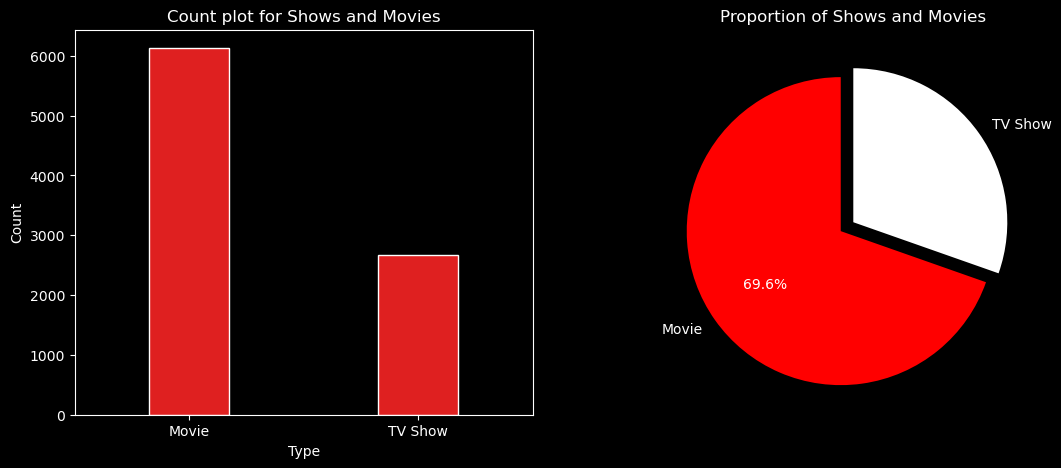

In [14]:
# Create a figure with a specified size (8x5 inches)
plt.figure(figsize=(13, 5))

# Bar plot
plt.subplot(1, 2, 1)
sns.barplot(x=type['type'], y=type['count'], edgecolor="white", color="#ff0000", width=0.35)
plt.ylabel("Count")  # Set the label for the Y-axis (Count)
plt.xlabel("Type")  # Set the label for the X-axis (Type of shows/movies)
plt.title("Count plot for Shows and Movies")  # Set the title for the plot

# Pie chart
plt.subplot(1, 2, 2)
# Use red and white for pie chart
plt.pie(type['count'], labels=type['type'], autopct='%1.1f%%', startangle=90, colors=["#ff0000", "white"],explode=[0.1,0])
plt.title("Proportion of Shows and Movies")  # Title for the pie chart

# Show the plot
# plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


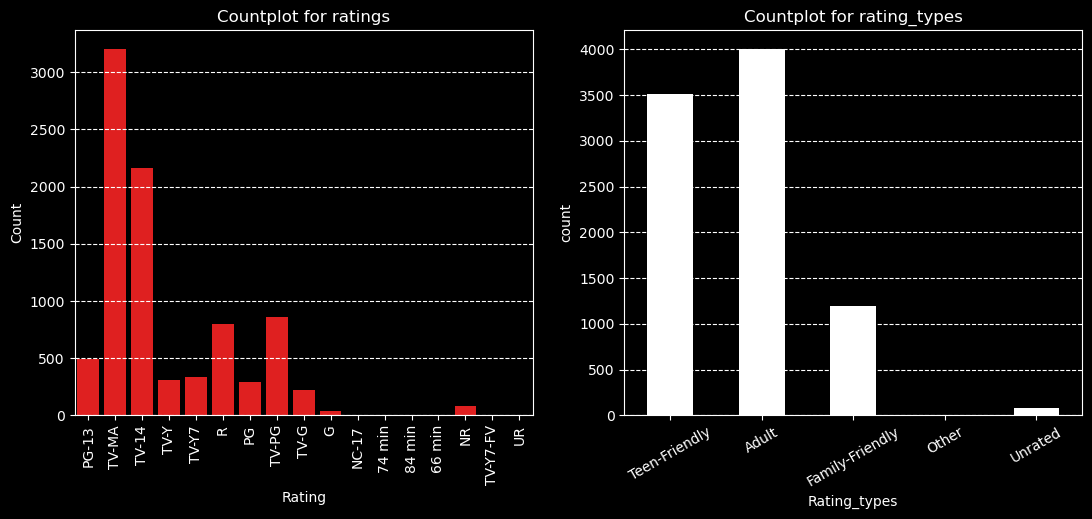

In [15]:
# Set figure size for the entire plot
plt.figure(figsize=(13, 5))

# First subplot: Countplot for ratings
plt.subplot(1, 2, 1)  # Create the first subplot in a 1x2 grid
sns.countplot(x=df_rating["rating"],color="red")  # Plot the count of each rating
plt.title("Countplot for ratings")  # Add a title to the plot
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.grid(axis="y",linestyle="--")  # Add gridlines, only horizontal ones
plt.xlabel("Rating")  # Label for the x-axis
plt.ylabel("Count")  # Label for the y-axis

# Second subplot: Countplot for rating types
plt.subplot(1, 2, 2)  # Create the second subplot in a 1x2 grid
sns.countplot(x=df_rating["rating_type"], width=0.5,color="white")  # Plot the count of each rating type, adjust bar width
plt.title("Countplot for rating_types")  # Add a title to the plot
plt.xticks(rotation=30)
plt.grid(axis="y",linestyle="--")  # Add gridlines, only horizontal ones
plt.xlabel("Rating_types")  # Label for the x-axis

# Display the combined figure with both subplots
plt.show()

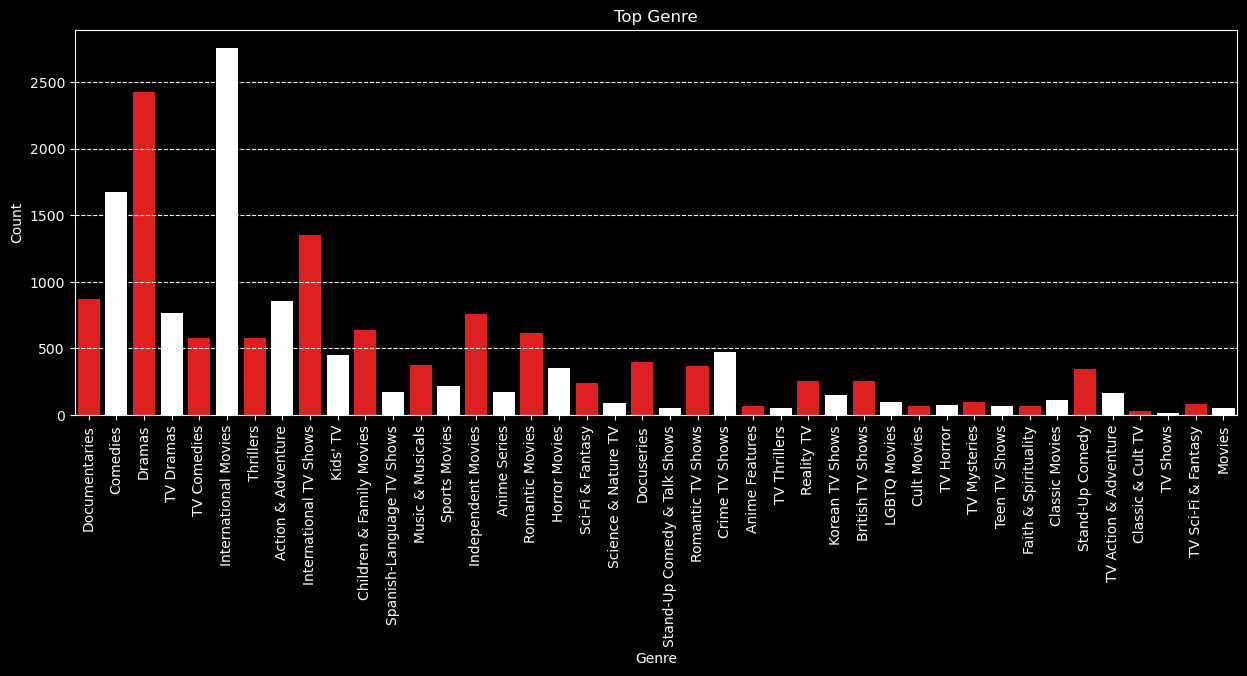

In [16]:
plt.figure(figsize=(15,5))
# Create the countplot with the genres 
colors = ["red", "white"] #color palette for the bars
sns.countplot(x='genre', data=df_genre, palette=colors)

# Set labels and title
plt.xlabel("Genre")  #label for x-axis
plt.ylabel("Count")   # label for y-axis
plt.title("Top Genre")  #title for the coutplot
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--") #Add gridlines, only horizontal ones

# Show the plot
plt.show()

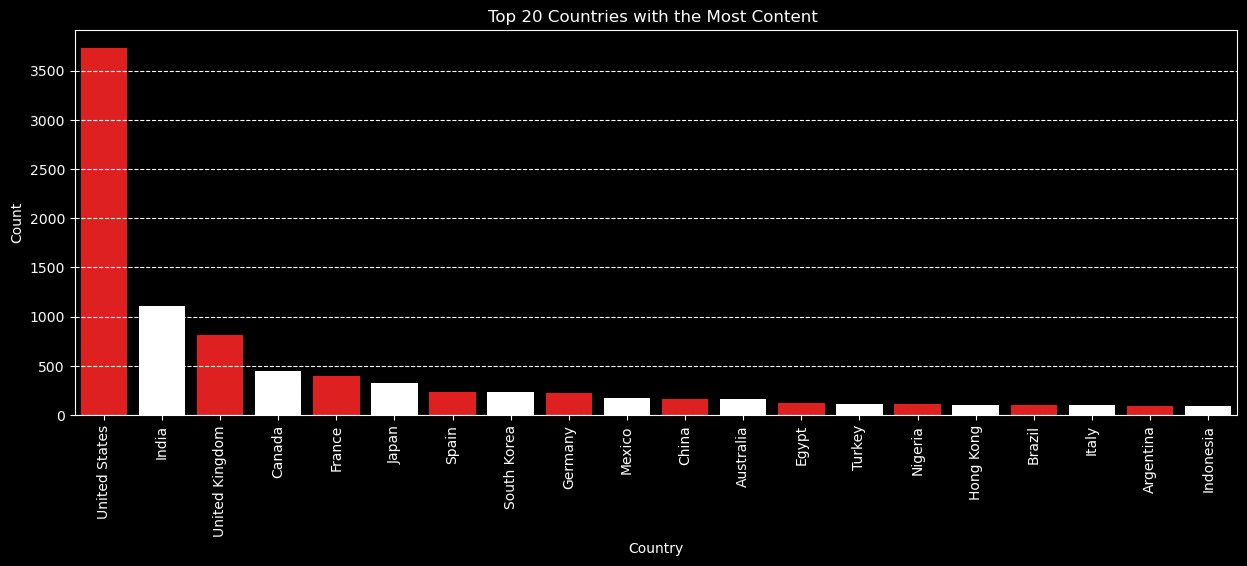

In [17]:
plt.figure(figsize=(15,5))
# Count the number of occurrences of each genre in descending order
country_order = df_countries['country'].value_counts().head(20).index

# Create the countplot with the genres in descending order
colors = ["red", "white"]
sns.countplot(x='country', data=df_countries, palette=colors, order=country_order)

# Set labels and title
plt.xlabel("Country")  # label the x-axis
plt.ylabel("Count")   # label the y-axis
plt.title("Top 20 Countries with the Most Content ")  # title for the countplot
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--") #Add gridlines, only horizontal ones

# Show the plot
plt.show()

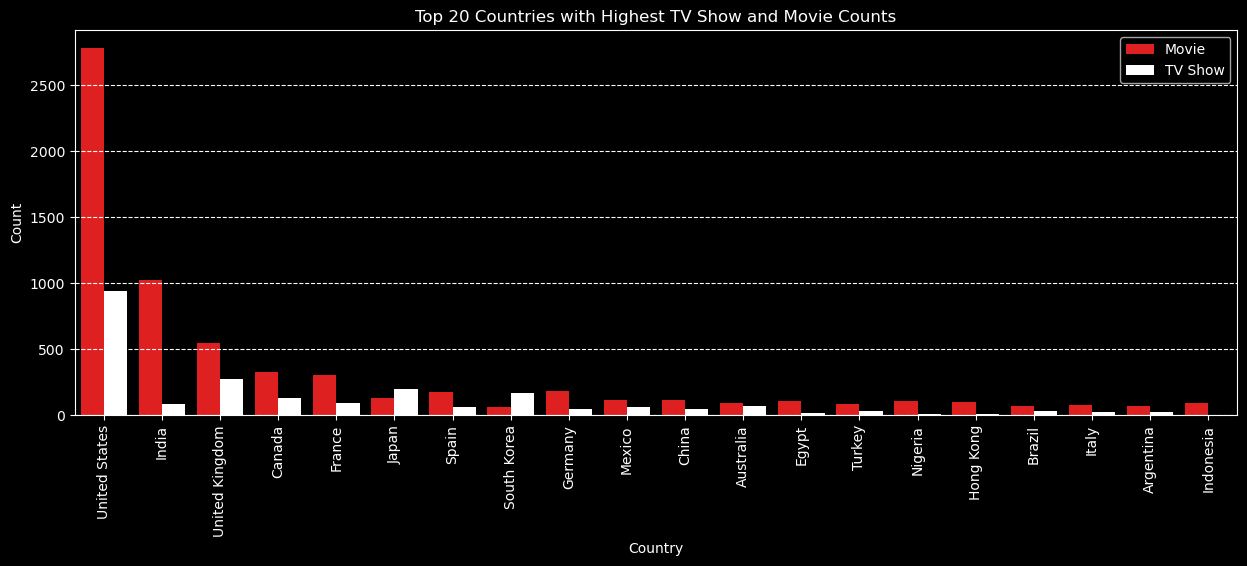

In [18]:
# Merge the DataFrames on the common key (e.g., 'show_id')
df_combined = df_countries.merge(df_final[['show_id', 'type']], on='show_id', how='inner')

# Count the number of occurrences of each country in descending order
country_order = df_combined['country'].value_counts().head(20).index

# Define the color palette
colors = ["red", "white"]

# Create the countplot with the top 20 countries
plt.figure(figsize=(15, 5))
sns.countplot(x='country', hue='type', data=df_combined, palette=colors, order=country_order)

# Set labels and title
plt.xlabel("Country")    #label the x-axis
plt.ylabel("Count")     #label the y-axis
plt.title("Top 20 Countries with Highest TV Show and Movie Counts")  #title for the countplot
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--") #Add gridlines, only horizontal ones
plt.legend()
# Show the plot
plt.show()


## Responding to Key Queries Based on the Data

**QUESTION 1: what is the average duration of movie in each genre?**

In [19]:
query1='''SELECT DISTINCT 
    ng.genre, -- The genre of the movie
    ROUND(AVG(CAST(REPLACE(duration, ' min', '') AS INTEGER)), 2) AS Avg_duration -- Calculate and round the average duration
FROM 
    netflix_final n -- Main Netflix data table
INNER JOIN 
    netflix_genre ng ON n.show_id = ng.show_id 
WHERE n.type = 'Movie' 
GROUP BY ng.genre -- Group by genre to calculate the average duration for each
ORDER BY ROUND(AVG(CAST(REPLACE(duration, ' min', '') AS INTEGER)), 2); -- Order by the rounded average duration '''
df1=pd.read_sql(query1,engine)
df1

,genre,avg_duration
0,Movies,45.48
1,Stand-Up Comedy,67.33
2,Children & Family Movies,79.94
3,Documentaries,81.63
4,Anime Features,92.94
5,LGBTQ Movies,94.29
6,Sports Movies,94.70
7,Horror Movies,98.45
8,Independent Movies,101.02
9,Comedies,103.86


**QUESTION 2: for each director count the no. of tv-shows and movies created by then in separate columns for directors who have created tv-shows and movies both**

In [20]:
query2='''SELECT 
    nd.director,
    COUNT(DISTINCT CASE WHEN n.type = 'Movie' THEN n.show_id END) AS count_movies,
    COUNT(DISTINCT CASE WHEN n.type = 'TV Show' THEN n.show_id END) AS count_tv_shows
FROM 
    netflix_final n 
INNER JOIN 
    netflix_directors nd ON n.show_id = nd.show_id 
GROUP BY nd.director -- Group by each director
HAVING COUNT(DISTINCT n.type) > 1; '''
df2=pd.read_sql(query2,engine)
df2

,director,count_movies,count_tv_shows
0,Abhishek Chaubey,4,1
1,Alastair Fothergill,1,3
2,Alban Teurlai,1,1
3,Alessandro Angulo,1,1
4,Andrew Tan,1,1
...,...,...,...
78,Tsutomu Mizushima,1,1
79,Vasan Bala,1,1
80,Vikramaditya Motwane,3,1
81,Weica Wang,1,1


**QUESTION 3: Which actor/actress has appeared in the highest number of Netflix movies?**

In [21]:
query3='''SELECT nc.casting, COUNT(DISTINCT nc.show_id) AS number_of_movies
FROM netflix_cast nc  
INNER JOIN netflix_final n ON nc.show_id = n.show_id  -- Join with the Netflix final table to filter by movie type
WHERE n.type = 'Movie'  
GROUP BY nc.casting  -- Group by the actor/actress (casting)
ORDER BY number_of_movies DESC  
LIMIT 1;  '''
df3=pd.read_sql(query3,engine)
df3

,casting,number_of_movies
0,Anupam Kher,42


**QUESTION 4: which country has highest number of comedy movies?**

In [22]:
query4='''SELECT 
    nc.country, 
    COUNT(DISTINCT ng.show_id) AS no_of_movies -- Count of unique comedy movies available in the country
FROM 
    netflix_countries nc 
INNER JOIN 
    netflix_genre ng ON ng.show_id = nc.show_id 
INNER JOIN 
    netflix_final n ON n.show_id = nc.show_id 
WHERE 
      ng.genre = 'Comedies' 
      AND n.type = 'Movie'
GROUP BY nc.country -- Group by country to count movies available per country
ORDER BY COUNT(DISTINCT ng.show_id) DESC LIMIT 1;'''
df4=pd.read_sql(query4,engine)
df4

,country,no_of_movies
0,United States,685


**QUESTION 5: for each year (as per date added to netflix), which director has maximum 
number of movies released?**

In [23]:
query5='''WITH cte AS (
    SELECT 
        EXTRACT(YEAR FROM n.date_added) AS release_year,
        nd.director,
        COUNT(n.show_id) AS movie_count,
        ROW_NUMBER() OVER (
            PARTITION BY EXTRACT(YEAR FROM n.date_added) 
            ORDER BY COUNT(n.show_id) DESC
        ) AS rn 
    FROM netflix_final n
    INNER JOIN netflix_directors nd ON n.show_id = nd.show_id
    WHERE n.type = 'Movie'
    GROUP BY EXTRACT(YEAR FROM n.date_added), nd.director
)
SELECT 
    release_year,
    director,
    movie_count
FROM cte 
WHERE rn = 1
ORDER BY release_year;'''
df5=pd.read_sql(query5,engine)
df5

,release_year,director,movie_count
0,2008.0,Sorin Dan Mihalcescu,1
1,2009.0,Ole Bornedal,1
2,2010.0,Jim Monaco,1
3,2011.0,IcÃ­ar BollaÃ­n,1
4,2012.0,Tim Johnson,1
5,2013.0,Will Lovelace,1
6,2014.0,Leo Riley,2
7,2015.0,Luc Vinciguerra,2
8,2016.0,Jan Suter,4
9,2017.0,Jay Chapman,7


**QUESTION 6: find the list of directors who have created both horror and comedy movies
display director name along with number of comdey and horror movie directed by them**

In [24]:
query6='''SELECT nd.director, 
       COUNT(DISTINCT CASE WHEN ng.genre = 'Comedies' THEN n.show_id END) AS comedy_movies_count,
       COUNT(DISTINCT CASE WHEN ng.genre = 'Horror Movies' THEN n.show_id END) AS horror_movies_count
FROM netflix_directors nd
INNER JOIN netflix_genre ng ON nd.show_id = ng.show_id
INNER JOIN netflix_final n ON n.show_id = nd.show_id
WHERE n.type = 'Movie'
GROUP BY nd.director
HAVING COUNT(DISTINCT CASE WHEN ng.genre = 'Comedies' THEN n.show_id END) > 0 
   AND COUNT(DISTINCT CASE WHEN ng.genre = 'Horror Movies' THEN n.show_id END) > 0;'''
df6=pd.read_sql(query6,engine)
df6

,director,comedy_movies_count,horror_movies_count
0,Ãlex de la Iglesia,2,1
1,Adam Egypt Mortimer,1,1
2,Ahmed Zein,2,2
3,Amar Kaushik,1,1
4,Anggy Umbara,1,1
5,Anthony Scott Burns,1,2
6,Anurag Kashyap,1,1
7,B.N. Shajeer Sha,1,1
8,Banjong Pisanthanakun,1,3
9,Brad Peyton,1,1


**QUESTION 7: Identify the top 5 longest movies on Netflix and their respective directors.**

In [25]:
query7='''SELECT nd.director,
       CAST(REPLACE(n.duration,' min','')AS INT) AS duration_in_min
FROM netflix_directors nd 
INNER JOIN netflix_final n ON nd.show_id=n.show_id
WHERE n.type='Movie'
  AND n.duration IS NOT NULL
ORDER BY duration_in_min DESC 
LIMIT 5 ;'''
df7=pd.read_sql(query7,engine)
df7

,director,duration_in_min
0,Houssam El-Din Mustafa,253
1,Samir Al Asfory,237
2,Fouad El-Mohandes,233
3,Hussein Kamal,230
4,Sergio Leone,229


**QUESTION 8: How has the number of movies and TV shows added to Netflix each year changed over time?**

In [26]:
query8='''SELECT EXTRACT(YEAR FROM n.date_added)as release_year,
	   COUNT(CASE WHEN n.type='Movie' THEN n.show_id END) AS total_movie_released,
	   COUNT(CASE WHEN n.type='TV Show' THEN n.show_id END) as total_tvshows_released
FROM netflix_final n
GROUP BY EXTRACT(YEAR FROM n.date_added)
ORDER BY EXTRACT(YEAR FROM n.date_added)
;'''
df8=pd.read_sql(query8,engine)
df8

,release_year,total_movie_released,total_tvshows_released
0,2008.0,1,1
1,2009.0,2,0
2,2010.0,1,0
3,2011.0,13,0
4,2012.0,3,0
5,2013.0,6,5
6,2014.0,19,5
7,2015.0,56,26
8,2016.0,253,176
9,2017.0,839,349


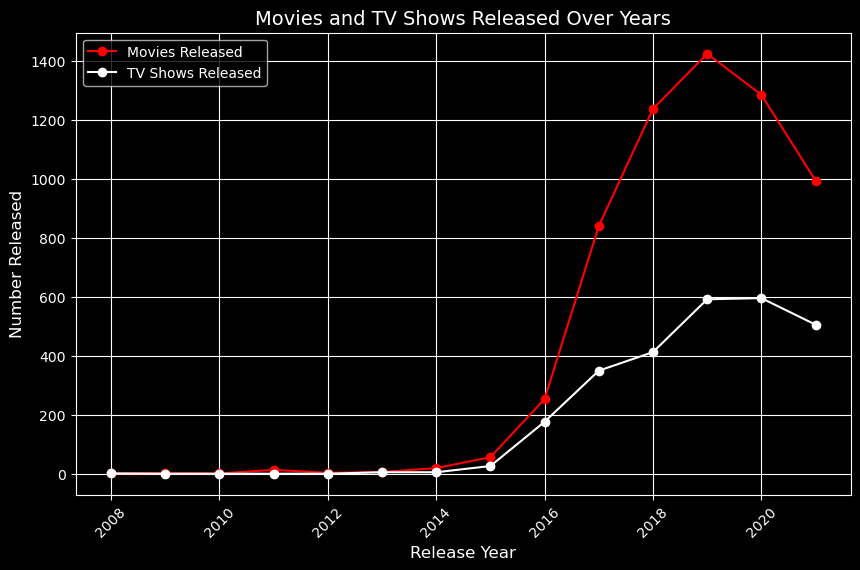

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(df8['release_year'], df8['total_movie_released'], marker='o', label='Movies Released',color='red')
plt.plot(df8['release_year'], df8['total_tvshows_released'], marker='o', label='TV Shows Released',color='white')

# Add labels and title
plt.title('Movies and TV Shows Released Over Years', fontsize=14)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number Released', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

## KEY INSIGHTS:
•The analysis reveals that Netflix hosts **more movies than TV shows**, with TV-MA ratings having the highest count of content.  
•The top five genres include International Movies, **Drama, Comedies, International TV Shows, and Action & Adventure**.   
•**Adult-rated content dominates the platform**, followed by teen-friendly and family-friendly categories.   
•**The United States** leads in the amount of content produced, followed **by India, the UK, Canada, and France.**   
•**Content additions saw a sharp rise from 2015 onwards**, marking Netflix's aggressive expansion, but a **slight decline occurred in 2021**, with 993     movies and 505 TV shows released compared to previous peak years.  
•Among actors, **Anupam Kher**, an Indian actor, has appeared in the highest number of Netflix movies. 